### Import Quasar catalog for DR14

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from astropy.io import fits as pyfits
from astropy.table import Table


DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="/home/hquintero/eboss/"
local_file = os.path.join(local_dir,file)

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    
catalog=Table.read('DR14Q_v4_4.fits')
#catalog.colnames
len(catalog)


/home/hquintero/eboss/DR14Q_v4_4.fits already exist


526356

### Filtering the data from FITS (name code,redshift, RA&DEC,MJD,BAL index) and sorting by plate

In [2]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:526356]
small_cat
len(reduced_cat)

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824303,244864389,6177,56268,595,BOSS,2.497,0.0,VI,2.496999979019165,2.49796199798584,0.0008690897957421839,0,2.5099661,-1.0,-1.0,2199023255552,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.660184383392334 .. 5.348500728607178,15.485949516296387 .. 0.861799418926239,21.94196891784668 .. 20.659208297729492,0.16387343406677246 .. 0.21075020730495453,-25.664871,0.16341499984264374 .. 0.048689112067222595,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.04631861299276352,701.1042837308206,0.05252976343035698,384.75096219826605,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.5,0.185,5.900000095367432,0.9299,16.206,0.211,5.199999809265137,0.8249,12.321,--,0.30000001192092896,1.149,8.51,0.185,0.699999988079071,1.036,0000,BBUU,0.495515,1.0,1.8603829687921641e-31,3.147684406018196e-32,2.310947837572515e-31,4.565332356351401e-32,2.355314285756731e-31,5.970480393631547e-32,2.427149215733221e-31,6.521724355219432e-32,0,-1.0,-1.0,-1.0
000001.37-011930.0,0.005746209112004408,-1.3250088011125059,66666942,4354,55810,646,BOSS,2.3280000000000003,0.0,VI,2.328000068664551,2.333164691925049,0.0001957574422704056,0,2.3350306,2.3483452999999996,2.3483452999999996,16492675088384,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,5.298428535461426 .. 10.920283317565918,7.55182409286499 .. 0.9089431166648865,20.688875198364258 .. 19.899463653564453,0.07446388900279999 .. 0.10334030538797379,-26.184576,0.186440572142601 .. 0.05554952844977379,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.09291329234838486,44.988086770623894,0.22756947576999664,2.5174224638761955,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,16.72,0.103,10.60000038146972

### Lets plot the distribution in RA/DEC of the full catalog, and the small catalog

Text(0, 0.5, 'DEC')

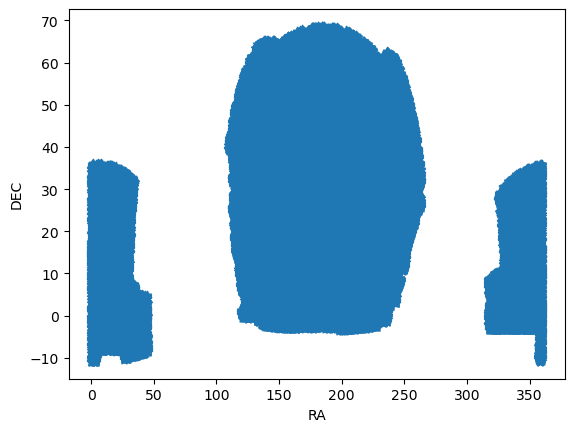

In [3]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='*')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

### Making a loop to check data names and saving txt files

In [4]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    if (q>=1000):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
    elif ((q>=100) and (q<1000)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
    elif ((q>=10) and (q<100)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
    elif ((q>=0) and (q<10)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
              
#plate_list=np.unique(plate_list)
#plate_list.insert(0,'id')
#plate_list.sort()
np.savetxt('/home/hquintero/spc_fulldr14/DR14spclist_fd.txt',plate_list, fmt='%s', delimiter=',') # fd = For download
print(len(plate_list))
plate_list.insert(0,'id')
np.savetxt('/home/hquintero/spc_fulldr14/DR14spclist_fc.txt',plate_list, fmt='%s', delimiter=',') # fc = For check
print(len(plate_list))

168045
168046


## Making list just for BAL Quasars

In [8]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']>0)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:526356]
small_cat
len(reduced_cat)

12440

Text(0, 0.5, 'DEC')

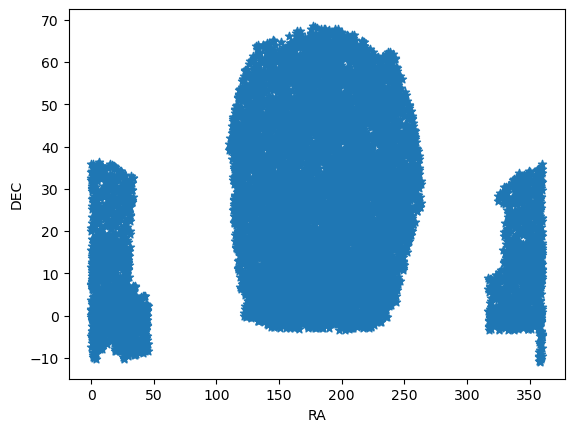

In [9]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='*')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [10]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    if (q>=1000):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
    elif ((q>=100) and (q<1000)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
    elif ((q>=10) and (q<100)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
    elif ((q>=0) and (q<10)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
              
#plate_list=np.unique(plate_list)
#plate_list.insert(0,'id')
#plate_list.sort()
np.savetxt('/home/hquintero/spc_fulldr14/balDR14spclist_fd.txt',plate_list, fmt='%s', delimiter=',') # fd = For download
print(len(plate_list))

12440


In [11]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:526356]
small_cat
len(reduced_cat)

180485

In [13]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    if (q>=1000):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
    elif ((q>=100) and (q<1000)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
    elif ((q>=10) and (q<100)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
    elif ((q>=0) and (q<10)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
              
plate_list.insert(0,'id')
np.savetxt('/home/hquintero/spc_fulldr14/balDR14spclist_fc.txt',plate_list, fmt='%s', delimiter=',') # fc = For check
print(len(plate_list))

180486


## Making list for Side Bands

In [17]:
w = (catalog['THING_ID']>0) & (catalog['Z']<2.1) & (catalog['RA']!=catalog['DEC']) \
& (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)
reduced_cat = catalog[w]
len(reduced_cat)


reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:101785]
small_cat
len(reduced_cat)

101659

Text(0, 0.5, 'DEC')

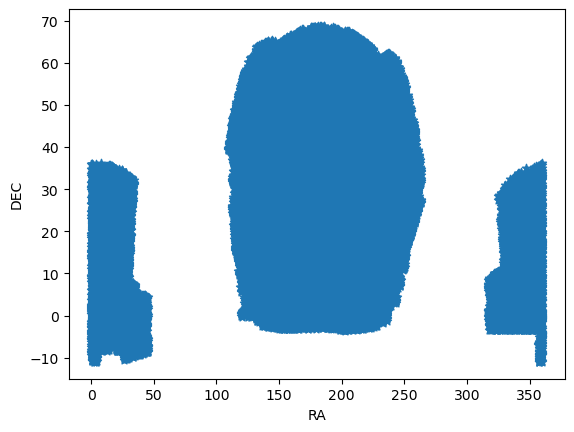

In [18]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='*')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [19]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    if (q>=1000):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
    elif ((q>=100) and (q<1000)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
    elif ((q>=10) and (q<100)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
    elif ((q>=0) and (q<10)):
        plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
              
np.savetxt('/home/hquintero/spc_fulldr14/SBDR14spclist_fd.txt',plate_list, fmt='%s', delimiter=',') # fd = For download
print(len(plate_list))
plate_list.insert(0,'id')
np.savetxt('/home/hquintero/spc_fulldr14/SBDR14spclist_fc.txt',plate_list, fmt='%s', delimiter=',') # fc = For check
print(len(plate_list))

101659
101660
